In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

# Load the dataset (assuming you have 'iris.csv' in the same directory)
df = pd.read_csv('iris.csv')


In [22]:
# Inspect the data
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [24]:
# Remove 'Id' and 'Species' columns for clustering
X = df.drop(['Id', 'Species'], axis=1)


In [25]:
# Standardize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
# Apply K-Means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add the predicted clusters to the dataset
df['cluster'] = kmeans.labels_

/Users/baharyatman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
# Convert species names to numeric labels
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['species_numeric'] = df['Species'].map(species_mapping)



In [28]:
# Compare the actual species with predicted clusters using a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(df['species_numeric'], df['cluster']))


Confusion Matrix:
[[ 0 50  0]
 [39  0 11]
 [14  0 36]]


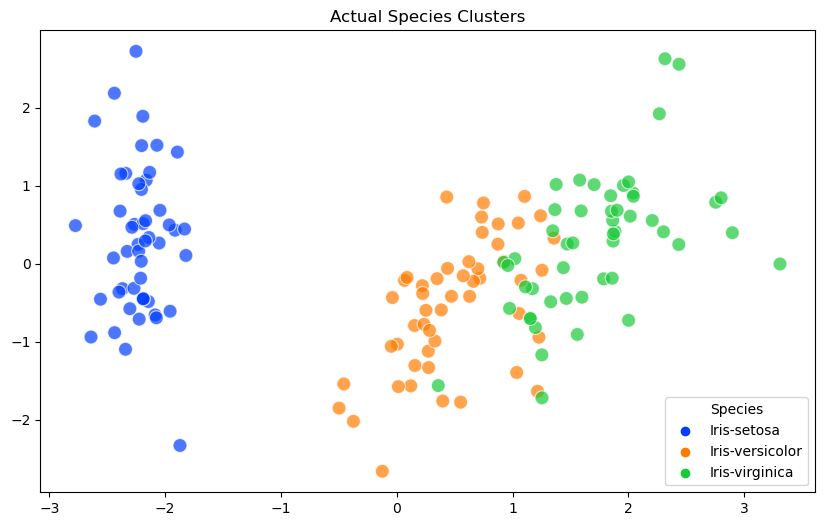

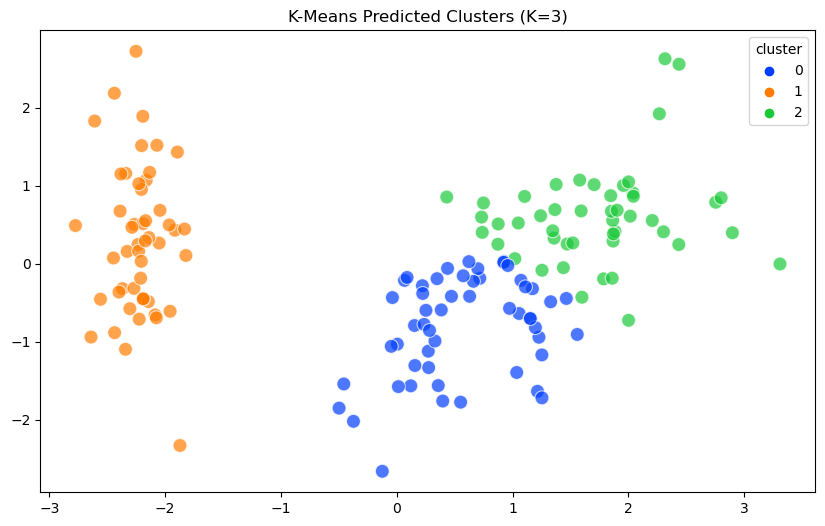

In [29]:
# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the actual species
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Species'], palette='bright', s=100, alpha=0.7)
plt.title('Actual Species Clusters')
plt.show()

# Visualize the clusters predicted by K-Means
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='bright', s=100, alpha=0.7)
plt.title('K-Means Predicted Clusters (K=3)')
plt.show()